# Support Vector Machines (SVM)

```{warning}
This is a heavy-math topic! See Vorontsov's [slides](http://machinelearning.ru/wiki/images/archive/a/a0/20150316112120!Voron-ML-Lin-SVM.pdf) for details
```

# Introduction

The support vector machine is a type of supervised learning algorithm used for classification and regression analysis.
The support vector machine is based on the idea of finding a hyperplane that best separates the data points into different classes.
The hyperplane is chosen such that it maximizes the margin between the two classes. The support vector machine is a generalization of the maximal margin classifier and the support vector classifier.
Therefore, before starting, we need to touch on a little maximal margin classifier and the support vector classifier.


#### Maximal Margin Classifier

The maximal margin classifier is a simple linear classifier that separates the data points into different classes by finding a hyperplane that maximizes the margin between the two classes.
The margin is defined as the distance between the hyperplane and the closest data points from each class.
The maximal margin classifier is a special case of the support vector classifier.

The maximal margin classifier is designed specifically for linearly separable data, which refers to the condition in which data can be separated linearly using a hyperplane.

<img src="./svm/mmc.png" alt="sfsdgeg" />

However, this classifier has some drawbacks. It is super sensitive to outliers in training data.

<img src="./svm/mmc_1.png">

#### Support Vector Classifier

The support vector classifier is a linear classifier that separates the data points into different classes by finding a hyperplane that maximizes the margin between the two classes. The margin is defined as the distance between the hyperplane and the closest data points from each class. The support vector classifier is a special case of the support vector machine.

The support vector classifier is an extension of the maximal margin classifier and is less sensitive to individual data. Since it allows certain data to be misclassified, it’s also known as the “Soft Margin Classifier”. It creates a budget under which the misclassification allowance is granted. This classifier covers the drawbacks of the maximal margin classifier by allowing for some misclassification and being less reliant on the support vector.

<img src="./svm/svc.png">

But what about whis type of data?

<img src="./svm/svc_1.png">

No matter where we put the classifier, there will be a lot of missclassification

<img src="./svm/svc_2.png">
<img src="./svm/svc_3.png">

#### How do SVM covers drawbacks of SVC?

The support vector machine covers the drawbacks of the support vector classifier by using a kernel function to transform the input data into a higher-dimensional space. This allows the support vector machine to handle non-linearly separable data. The support vector machine is also more robust to noise in the data and can handle large datasets.

<img src="./svm/svm.png">
<img src="./svm/svm_2.png">

Risk: 73.58881799836387
Accuracy: 68.0%


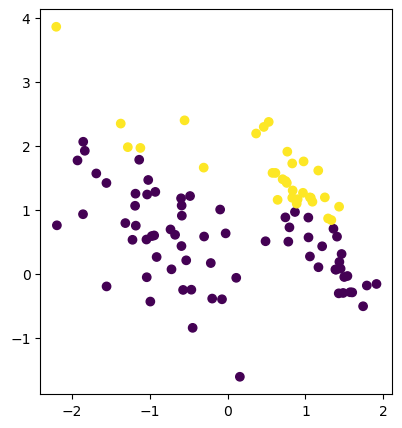

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Define the parameters
n = 2  # Dimension of the input vector
C = 1.5  # Regularization parameter

# Initialize the parameters
W = np.random.rand(n)
W_0 = 1.3

def a(x, W, W_0):
    return np.sign(np.dot(x, W) - W_0)

def risk(X, Y, W, W_0, C):
    M = 1 - Y * (np.dot(X, W) - W_0)
    return np.sum(np.maximum(0, M)) + 0.5 * C * np.sum(W**2)

X, Y = make_classification(n_samples=100, n_features=n, n_informative=n, n_redundant=0, n_clusters_per_class=1)
Y = 2 * Y - 1 

predictions = a(X, W, W_0)

r = risk(X, Y, W, W_0, C)
print(f"Risk: {r}")

accuracy = np.mean(predictions == Y)
print(f"Accuracy: {accuracy * 100}%")

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='viridis')

plt.show()